In [3]:
import os
import numpy as np
import pandas as pd
import re
os.chdir('/Users/manikant/Desktop/GT_files/Spring2024/MGT6314/Project')

In [6]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')
nltk.download('punkt')
import string
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/manikant/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /Users/manikant/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [26]:
data=pd.read_csv('financial_sentiment_data.csv')

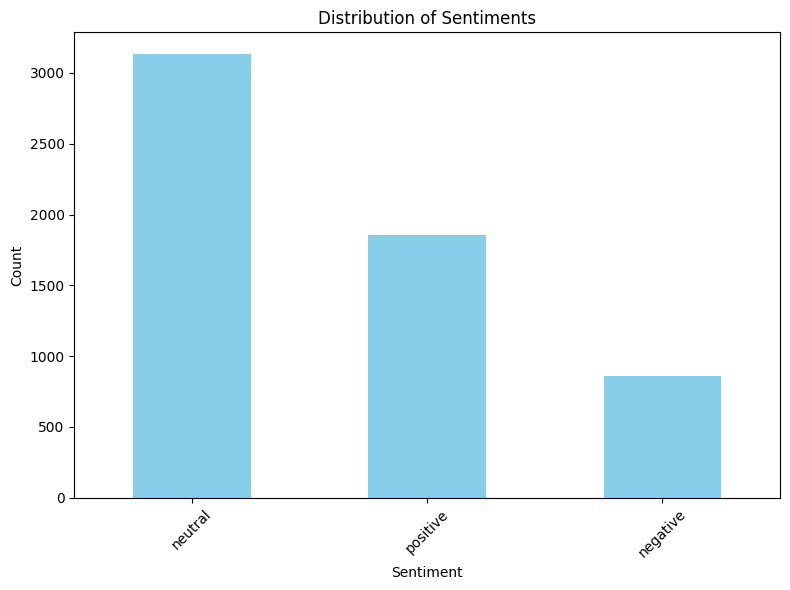

In [27]:
sentiment_counts = data['Sentiment'].value_counts()

plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [28]:
def preprocess_text(text): # Tokenize the text
    
    tokens = word_tokenize(text) # Convert to lowercase
    
    tokens = [word.lower() for word in tokens] # Remove punctuation
    
    tokens = [word for word in tokens if word not in string.punctuation] # Remove stopwords
    
    tokens = [word for word in tokens if word not in stop_words] # Join tokens back into string
    
    return " ".join(tokens)

In [29]:
data.drop_duplicates(inplace=True) # Drop duplicates

data.dropna(inplace=True) # Handle missing values (if any)

stop_words = set(stopwords.words('english')) # Text preprocessing

# Apply preprocessing to the 'Sentence' column
data['Processed_Text'] = data['Sentence'].apply(preprocess_text)

# Drop the original 'Sentences' column if needed
data.drop(columns=['Sentence'], inplace=True)

# Save cleaned data to a new CSV file if needed
data.to_csv('cleaned_dataset.csv', index=False)

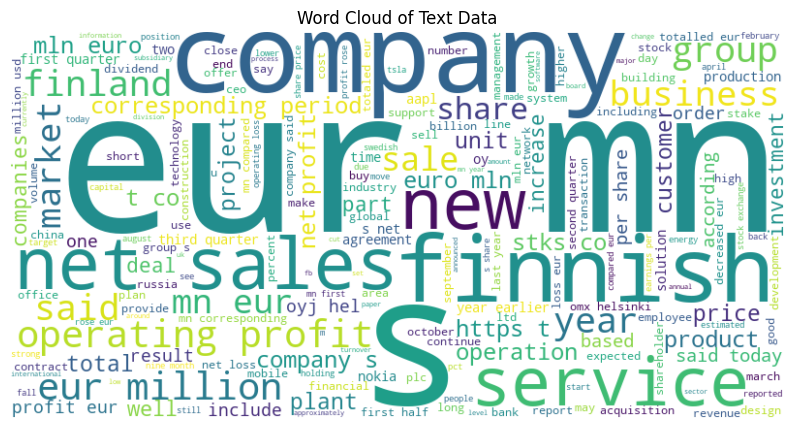

In [30]:
# Combine all sentences into a single string
all_text = ' '.join(data['Processed_Text'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

# Plot the WordCloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Text Data')
plt.axis('off')
plt.show()

In [31]:
data['temp_list'] = data['Processed_Text'].apply(lambda x:str(x).split())
top = Counter([item for sublist in data['temp_list'] for item in sublist])
temp = pd.DataFrame(top.most_common(20))
temp.columns = ['Common_words','count']

In [32]:
Positive_sent = data[data['Sentiment']=='positive']
Negative_sent = data[data['Sentiment']=='negative']
Neutral_sent = data[data['Sentiment']=='neutral']

In [33]:
from collections import Counter

#### Common words with positive sentiment

In [37]:
import plotly.express as px

In [38]:
top = Counter([item for sublist in Positive_sent['temp_list'] for item in sublist])
temp_positive = pd.DataFrame(top.most_common(20))
temp_positive.columns = ['Common_words','count']
temp_positive.style.background_gradient(cmap='Greens')

fig = px.bar(temp_positive, x="count", y="Common_words", title='Most Commmon Positive Words', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

#### Common words under negative sentiment

In [39]:
top = Counter([item for sublist in Negative_sent['temp_list'] for item in sublist])
temp_negative = pd.DataFrame(top.most_common(20))
temp_negative = temp_negative.iloc[1:,:]
temp_negative.columns = ['Common_words','count']
temp_negative.style.background_gradient(cmap='Reds')

In [40]:
fig = px.treemap(temp_negative, path=['Common_words'], values='count',title='Tree Of Most Common Negative Words')
fig.show()

In [41]:
top = Counter([item for sublist in Neutral_sent['temp_list'] for item in sublist])
temp_neutral = pd.DataFrame(top.most_common(20))
temp_neutral = temp_neutral.loc[1:,:]
temp_neutral.columns = ['Common_words','count']


fig = px.bar(temp_neutral, x="count", y="Common_words", title='Most Commmon Neutral Words', orientation='h', 
             width=700, height=700,color='Common_words')
fig.show()

In [42]:
data.head()

Sentiment                                     Processed_Text  \
0  positive  geosolutions technology leverage benefon 's gp...   
1  negative             esi lows 1.50 2.50 bk real possibility   
2  positive  last quarter 2010 componenta 's net sales doub...   
3   neutral  according finnish-russian chamber commerce maj...   
4   neutral  swedish buyout firm sold remaining 22.4 percen...   

                                           temp_list  
0  [geosolutions, technology, leverage, benefon, ...  
1     [esi, lows, 1.50, 2.50, bk, real, possibility]  
2  [last, quarter, 2010, componenta, 's, net, sal...  
3  [according, finnish-russian, chamber, commerce...  
4  [swedish, buyout, firm, sold, remaining, 22.4,...

In [53]:
def words_unique(sentiment,numwords,raw_words):
    '''
    Input:
        segment - Segment category (ex. 'Neutral');
        numwords - how many specific words do you want to see in the final result; 
        raw_words - list  for item in train_data[train_data.segments == segments]['temp_list1']:
    Output: 
        dataframe giving information about the name of the specific ingredient and how many times it occurs in the chosen cuisine (in descending order based on their counts)..

    '''
    allother = []
    for item in data[data.Sentiment != sentiment]['temp_list']:
        for word in item:
            allother .append(word)
    allother  = list(set(allother ))
    
    specificnonly = [x for x in raw_text if x not in allother]
    
    mycounter = Counter()
    
    for item in data[data.Sentiment == sentiment]['temp_list']:
        for word in item:
            mycounter[word] += 1
    keep = list(specificnonly)
    
    for word in list(mycounter):
        if word not in keep:
            del mycounter[word]
    
    Unique_words = pd.DataFrame(mycounter.most_common(numwords), columns = ['words','count'])
    
    return Unique_words

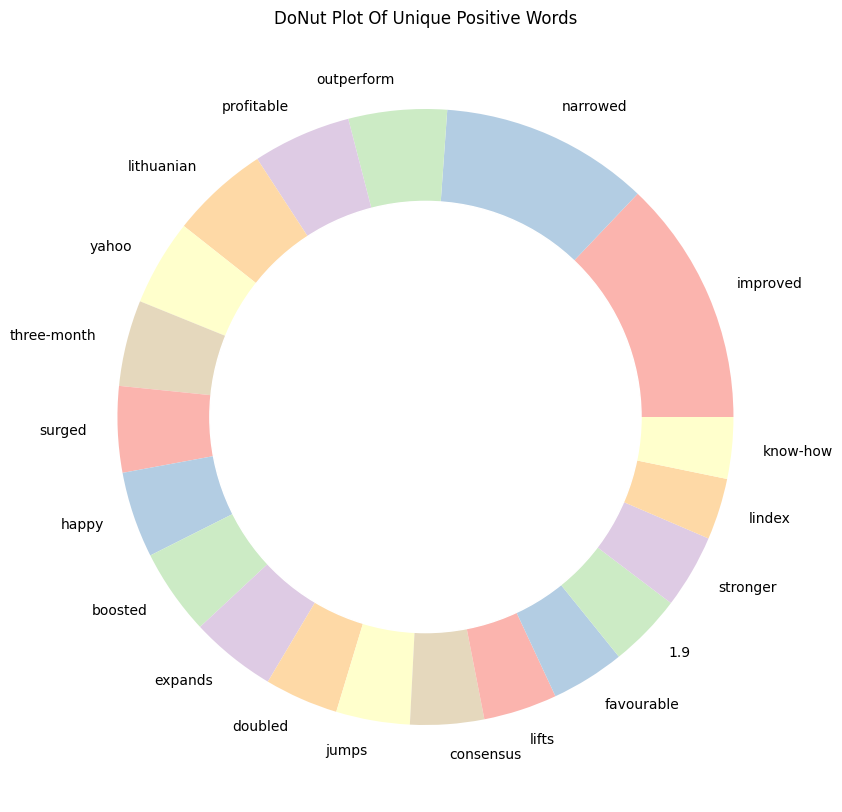

In [54]:
raw_text = [word for word_list in data['temp_list'] for word in word_list]

Unique_Positive= words_unique('positive', 20, raw_text)

from palettable.colorbrewer.qualitative import Pastel1_7
plt.figure(figsize=(16,10))
my_circle=plt.Circle((0,0), 0.7, color='white')
plt.pie(Unique_Positive['count'], labels=Unique_Positive.words, colors=Pastel1_7.hex_colors)
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.title('DoNut Plot Of Unique Positive Words')
plt.show()



#### Topic modeling

In [55]:
import gensim

In [64]:
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np

In [57]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()
def lemmatize_text(text):
    st = ""
    for w in w_tokenizer.tokenize(text):
        st = st + lemmatizer.lemmatize(w) + " "
    return st
data['Processed_Text'] = data.Processed_Text.apply(lemmatize_text)

In [69]:
data['temp_list'] = data['Processed_Text'].apply(lambda x:str(x).split())

In [71]:
data['temp_list'].head(10)

0    [geosolutions, technology, leverage, benefon, ...
1        [esi, low, 1.50, 2.50, bk, real, possibility]
2    [last, quarter, 2010, componenta, 's, net, sal...
3    [according, finnish-russian, chamber, commerce...
4    [swedish, buyout, firm, sold, remaining, 22.4,...
5      [spy, would, n't, surprised, see, green, close]
6    [shell, 's, 70, billion, bg, deal, meet, share...
7    [ssh, communication, security, corp, stock, ex...
8    [kone, 's, net, sale, rose, 14, year-on-year, ...
9    [stockmann, department, store, total, floor, s...
Name: temp_list, dtype: object

In [72]:
processed_docs=data['temp_list']
dictionary = gensim.corpora.Dictionary(processed_docs)
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

In [75]:
from gensim import corpora, models

In [76]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

tfidf = models.TfidfModel(bow_corpus)

In [77]:
corpus_tfidf = tfidf[bow_corpus]

In [78]:
for doc in corpus_tfidf:
    print(doc)
    break

[(0, 0.09355513865229517), (1, 0.24158430510365564), (2, 0.28268917258019705), (3, 0.2911206149617186), (4, 0.6080202211070435), (5, 0.26335276835817245), (6, 0.16339293697748294), (7, 0.3011670450269412), (8, 0.19728533864534392), (9, 0.4157601029726175)]


In [81]:
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)


for idx, topic in lda_model_tfidf.print_topics(-1):
    print('Topic: {} Word: {}'.format(idx, topic))

Topic: 0 Word: 0.013*"``" + 0.011*"'s" + 0.009*"pct" + 0.009*"share" + 0.008*"company" + 0.008*"eur" + 0.007*"mobile" + 0.007*"also" + 0.006*"service" + 0.006*"building"
Topic: 1 Word: 0.010*"eur" + 0.009*"share" + 0.008*"http" + 0.008*"company" + 0.008*"finnish" + 0.007*"'s" + 0.007*"mn" + 0.007*"new" + 0.006*"million" + 0.006*"group"
Topic: 2 Word: 0.016*"eur" + 0.013*"mn" + 0.010*"profit" + 0.010*"operating" + 0.009*"mln" + 0.008*"'s" + 0.008*"year" + 0.007*"sale" + 0.007*"company" + 0.006*"million"
Topic: 3 Word: 0.013*"quarter" + 0.013*"eur" + 0.011*"mn" + 0.010*"net" + 0.009*"company" + 0.009*"'s" + 0.009*"period" + 0.009*"expected" + 0.008*"profit" + 0.008*"third"
Topic: 4 Word: 0.018*"http" + 0.015*"'s" + 0.012*"company" + 0.011*"eur" + 0.009*"high" + 0.009*"long" + 0.009*"market" + 0.009*"operating" + 0.009*"plc" + 0.008*"price"
Topic: 5 Word: 0.012*"eur" + 0.011*"mn" + 0.009*"``" + 0.009*"service" + 0.009*"said" + 0.008*"'s" + 0.008*"million" + 0.008*"company" + 0.008*"custom

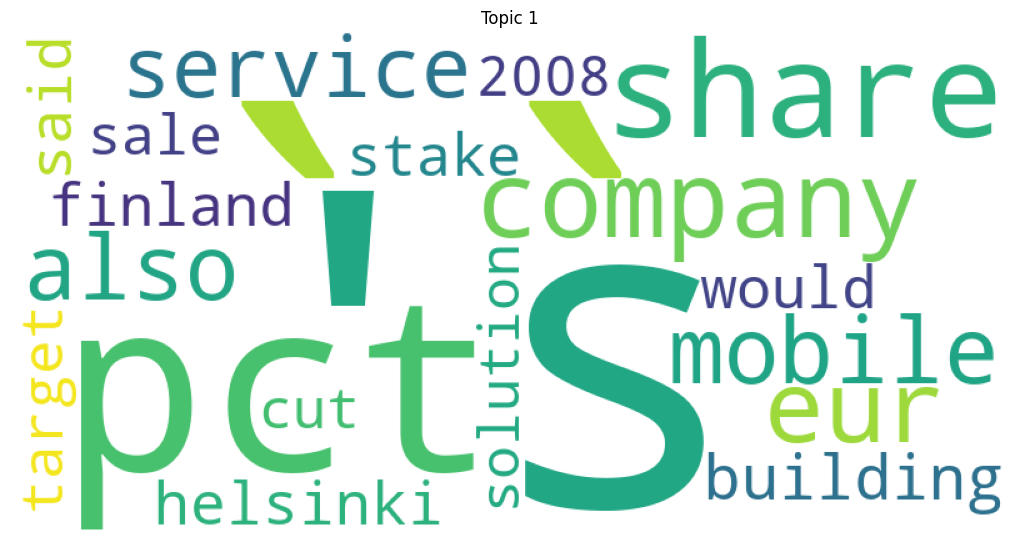

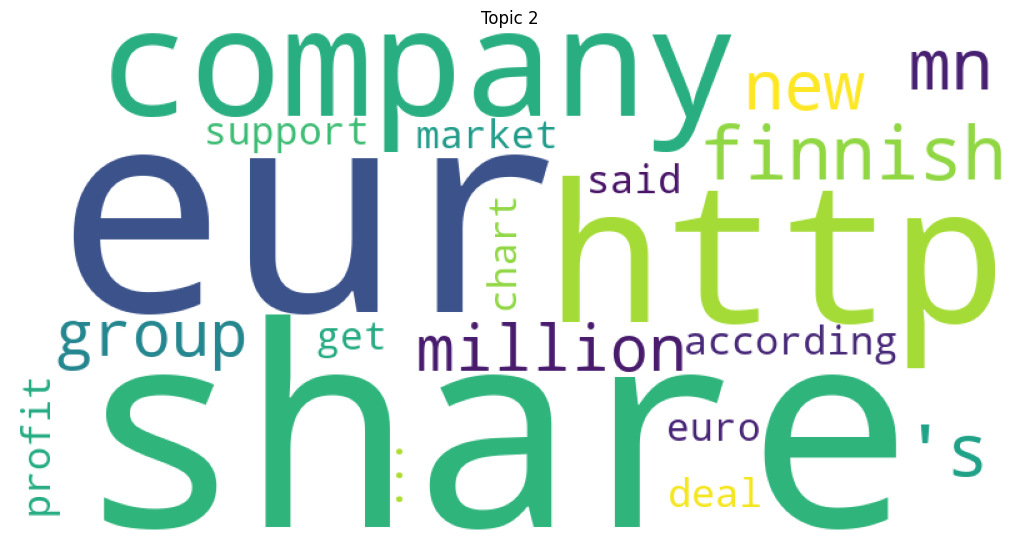

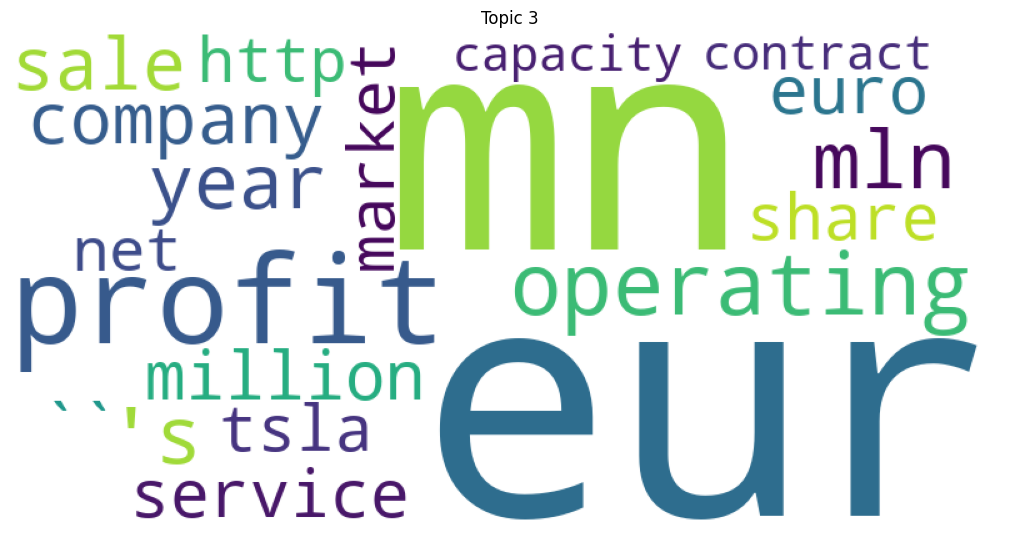

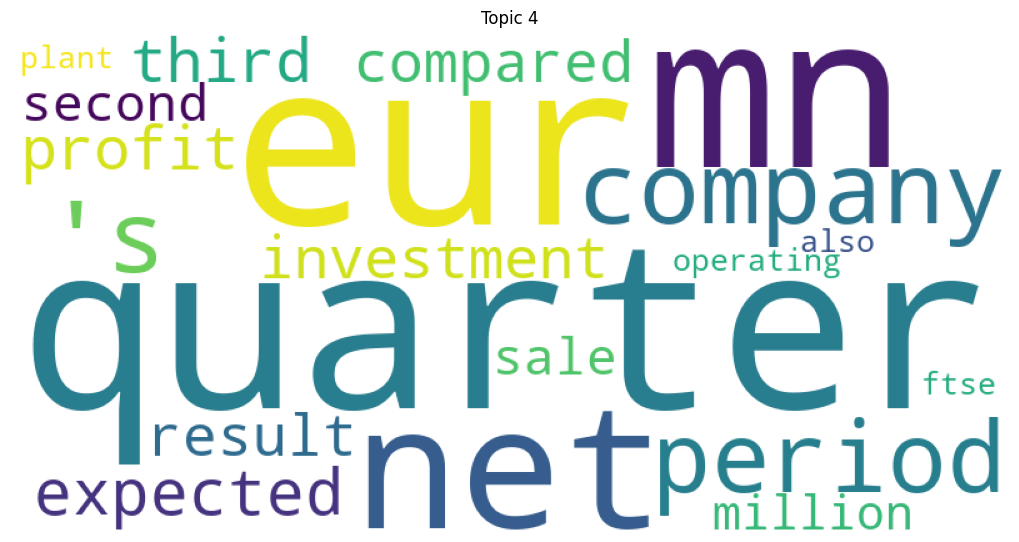

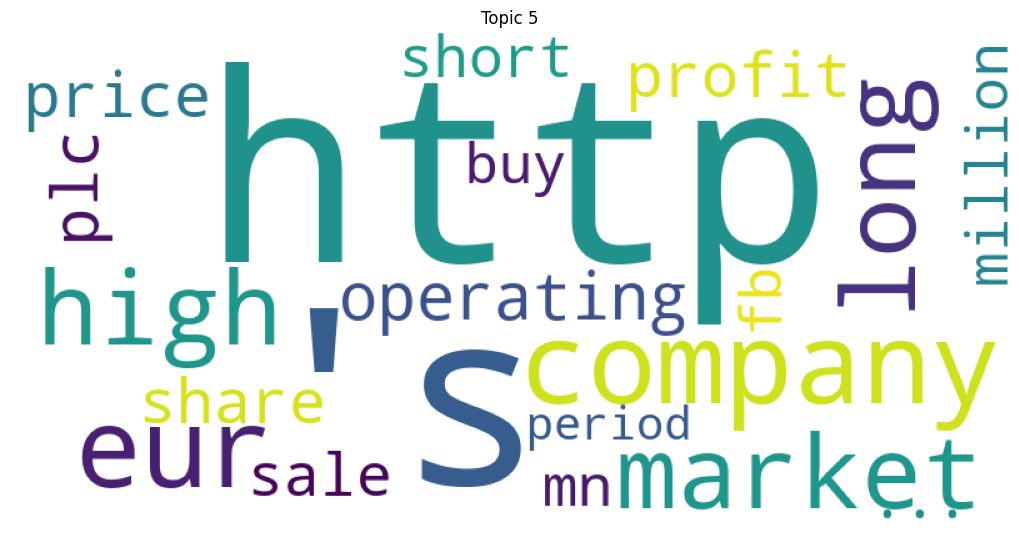

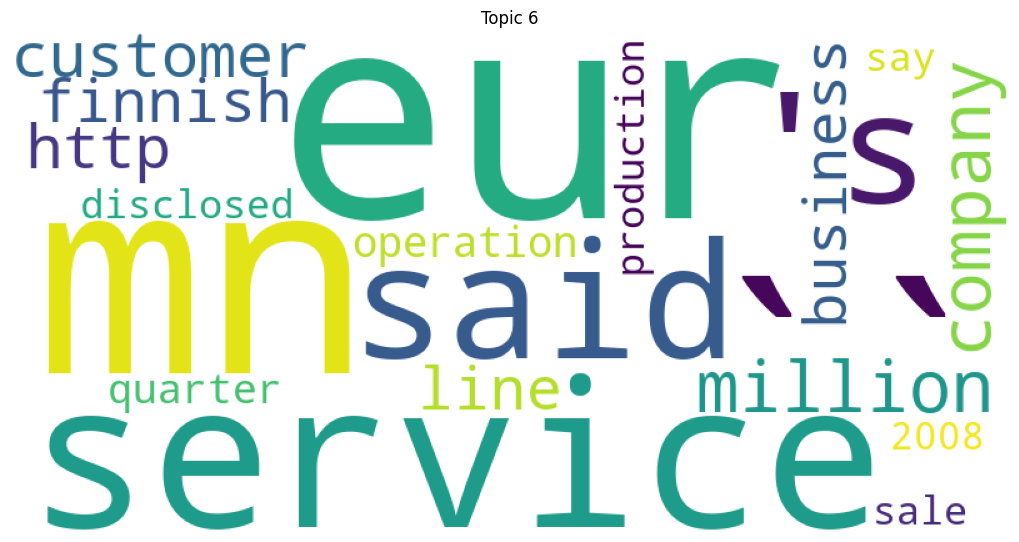

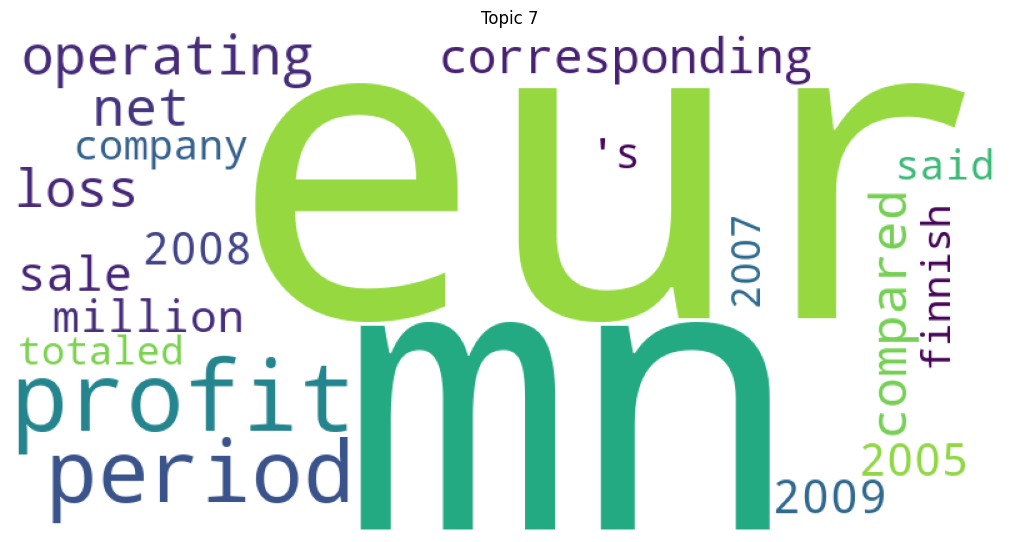

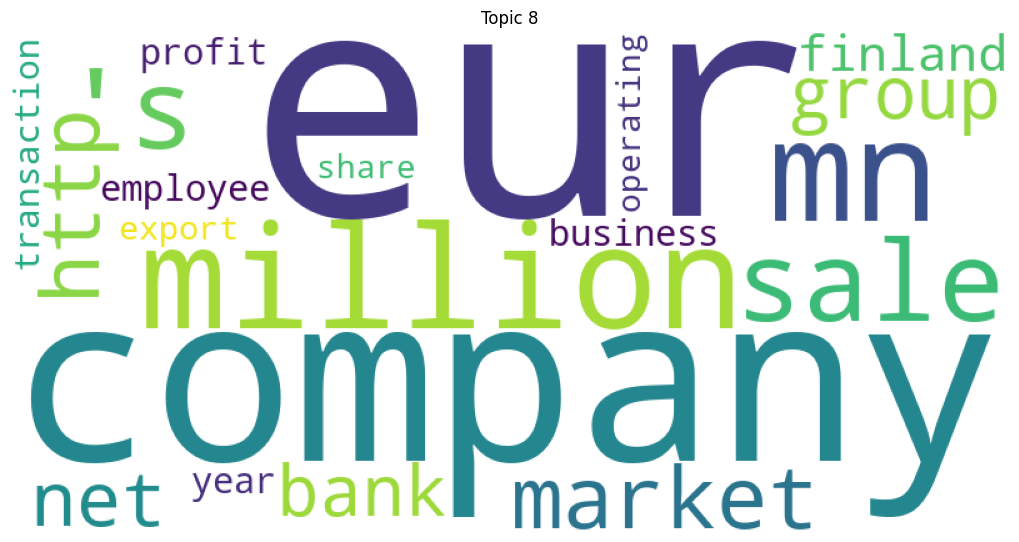

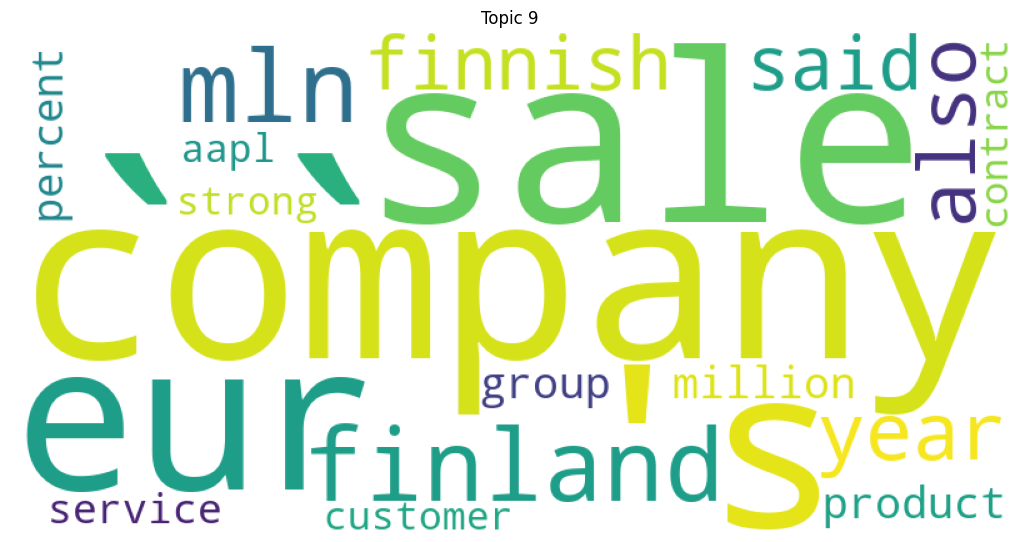

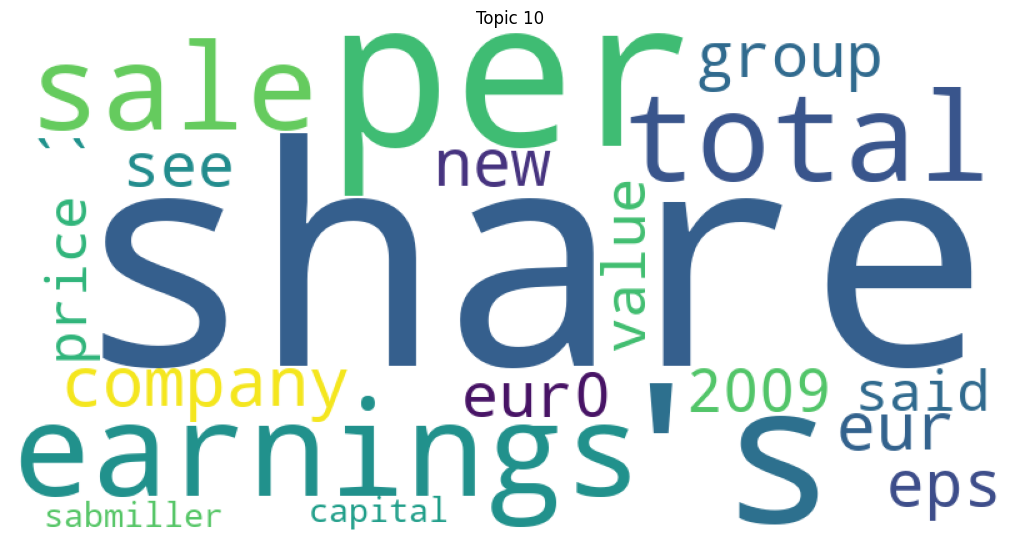

In [86]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Collect topics and words
topics = lda_model_tfidf.show_topics(formatted=False, num_words=20)

# Create word cloud for each topic
for topic_id, topic in enumerate(topics):
    wordcloud = WordCloud(width=800, height=400, background_color='white', 
                          stopwords=STOPWORDS, min_font_size=10).generate_from_frequencies(dict(topic[1]))

    plt.figure(figsize=(10, 6), facecolor=None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.title(f'Topic {topic_id+1}') 
    plt.show()

#### Sentiment Classification using BERT

In [94]:
class Tokenize_dataset:
  """
  This class tokenizes the dataset using bert tokenizer
  """

  def __init__(self, text, targets, tokenizer, max_len):
    self.text = text
    self.tokenizer = tokenizer
    self.max_len = max_len
    self.targets = targets

    def __len__(self):
        return len(self.targets)

    def __getitem__(self, item):
        text = str(self.text[item])
        targets = self.targets[item]
        """
        Using encode_plus instead of encode as it helps to provide additional information that we need
        """
        inputs = self.tokenizer.encode_plus(
            str(text),
            add_special_tokens = True,
            max_length = self.max_len,
            pad_to_max_length = True
        )

        ids = inputs["input_ids"]
        mask = inputs["attention_mask"]
        token_type_ids = inputs["token_type_ids"]

        return {
            "ids": torch.tensor(ids, dtype=torch.long),
            "mask": torch.tensor(mask, dtype=torch.long),
            "token_type_ids": torch.tensor(token_type_ids, dtype=torch.long),
            "targets": torch.tensor(targets, dtype=torch.long)
        }

In [95]:
data.head()

Sentiment                                     Processed_Text  \
0  positive  geosolutions technology leverage benefon 's gp...   
1  negative             esi low 1.50 2.50 bk real possibility    
2  positive  last quarter 2010 componenta 's net sale doubl...   
3   neutral  according finnish-russian chamber commerce maj...   
4   neutral  swedish buyout firm sold remaining 22.4 percen...   

                                           temp_list  \
0  [geosolutions, technology, leverage, benefon, ...   
1      [esi, low, 1.50, 2.50, bk, real, possibility]   
2  [last, quarter, 2010, componenta, 's, net, sal...   
3  [according, finnish-russian, chamber, commerce...   
4  [swedish, buyout, firm, sold, remaining, 22.4,...   

                                        text_explode  
0  geosolutions technology leverage benefon 's gp...  
1             esi low 1.50 2.50 bk real possibility   
2  last quarter 2010 componenta 's net sale doubl...  
3  according finnish-russian chamber commerce maj...  
4  swedish buyout firm sold remaining 22.4 percen...

In [114]:
import torch

In [115]:
class_counts = []
for i in data['Sentiment'].unique():
    class_counts.append(data[data['Sentiment']==i].shape[0])

print(f"Class Counts: {class_counts}")

num_samples = sum(class_counts)
print(num_samples)
labels = data['Sentiment'].values

labels_map={'positive':2,'neutral':1,'negative':0}

class_weights = []
for i in range(len(class_counts)):  
    if class_counts[i] != 0:
        class_weights.append(num_samples/class_counts[i])
    else:
        class_weights.append(0)
        

        
weights = [class_weights[labels_map[labels[i]]] for i in range(int(num_samples))]
sampler = torch.utils.data.sampler.WeightedRandomSampler(torch.DoubleTensor(weights), int(num_samples))

Class Counts: [1852, 860, 3124]
5836


In [116]:
train_maxlen = 140
batch_size = 16
epochs = 10
bert_model = 'bert-base-uncased'
learning_rate = 3e-5

In [120]:
import torch.nn as nn

In [121]:
class CompleteModel(nn.Module):
    """
    The model architecture is defined here which is a fully connected layer + normalization on top of a BERT model
    """

    def __init__(self, bert):
        super(CompleteModel, self).__init__()
        self.bert = BertModel.from_pretrained(bert)
        self.drop = nn.Dropout(p=0.25)
        self.out = nn.Linear(self.bert.config.hidden_size, 2) # Number of output classes = 3, positive, negative and N(none)

    def forward(self, ids, mask, token_type_ids):
        _, pooled_output = self.bert(ids, attention_mask=mask, token_type_ids=token_type_ids, return_dict=False)
        output = self.drop(pooled_output)
        return self.out(output)

In [122]:

def train_function(data_loader, model, optimizer, device):
    """
    Function defines the training that we will happen over the entire dataset
    """
    model.train()

    running_loss = 0.0
    """
    looping over the entire training dataset
    """
    for i, data in enumerate(data_loader):
        mask = data["mask"].to(device, dtype=torch.long)
        ids = data["ids"].to(device, dtype=torch.long)
        token_type_ids = data["token_type_ids"].to(device, dtype=torch.long)
        target = data["targets"].to(device, dtype=torch.long)
        optimizer.zero_grad()

        output = model(ids=ids, mask=mask, token_type_ids=token_type_ids)

        loss = loss_function(output, target)
        loss.backward()
        optimizer.step()
        
        """
        calculating loss and running loss
        """
        running_loss += loss.item()
        if i % 10 == 0 and i!=0:
            temp = f'Batch index = {i}\tRunning Loss = {running_loss/10}'
            print(temp)
            running_loss = 0.0

In [134]:
import os
import os.path
import json
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup
from torch.optim import lr_scheduler

In [135]:
def run(data):
#     data['Sentiment'] = data['Sentiment']
    data = data.reset_index(drop=True)
    tokenizer = BertTokenizer.from_pretrained(bert_model)
    train_dataset = Tokenize_dataset(
        text = data['Processed_Text'].values,
        targets = data['Sentiment'].values,
        tokenizer = tokenizer,
        max_len = train_maxlen
    )
    train_data_loader = torch.utils.data.DataLoader(
        train_dataset,
        batch_size = batch_size,
        shuffle = False,
        sampler = sampler
    )

    device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
    print(f"Device: {device}")
    model = CompleteModel(bert_model).to(device)
    optimizer = AdamW(model.parameters(), lr=learning_rate)
    scheduler = lr_scheduler.StepLR(
        optimizer,
        step_size = 1,
        gamma = 0.8
    )
    for epoch in range(epochs):
        train_function(data_loader=train_data_loader, model=model, optimizer=optimizer, device=device)
        print("\nEpoch = "+ str(epoch))
        print("\nLearning Rate = " + str(scheduler.get_lr()[0])+"\n")
        scheduler.step()
        torch.save(model, '/content/drive/MyDrive/NLP_disaster' + '/'+ str(epoch) + '.bin')
        
    

In [136]:
run(data)

Device: cpu


TypeError: 'Tokenize_dataset' object is not subscriptable

In [ ]:
import nltk

In [ ]:
nltk.download('wordnet')

In [ ]:
w_tokenizer = nltk.tokenize.WhitespaceTokenizer()
lemmatizer = nltk.stem.WordNetLemmatizer()
def lemmatize_text(text):
    st = ""
    for w in w_tokenizer.tokenize(text):
        st = st + lemmatizer.lemmatize(w) + " "
    return st
findf['Sentence'] = findf.Sentence.apply(lemmatize_text)

In [ ]:
s = 0.0
for i in findf['Sentence']:
    word_list = i.split()
    s = s + len(word_list)
print("Average length of each review : ",s/findf.shape[0])
pos = 0
for i in range(findf.shape[0]):
    if findf.iloc[i]['Sentiment'] == 'positive':
        pos = pos + 1
neg = findf.shape[0]-pos

print("Percentage of reviews with positive sentiment is "+str(pos/findf.shape[0]*100)+"%")
print("Percentage of reviews with negative sentiment is "+str(neg/findf.shape[0]*100)+"%") 


In [ ]:
reviews = findf['Sentiment'].values
labels = findf['Sentiment'].values
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(labels)

In [ ]:
train_sentences, test_sentences, train_labels, test_labels = train_test_split(reviews, encoded_labels, stratify = encoded_labels)


In [ ]:
import re
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import keras
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import math
import nltk

In [ ]:
# Hyperparameters of the model
vocab_size = 3000 # choose based on statistics
oov_tok = ''
embedding_dim = 100
max_length = 200 # choose based on statistics, for example 150 to 200
padding_type='post'
trunc_type='post'
# tokenize sentences
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index
# convert train dataset to sequence and pad sequences
train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, padding='post', maxlen=max_length)
# convert Test dataset to sequence and pad sequences
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, padding='post', maxlen=max_length)

In [ ]:
# model initialization
model = keras.Sequential([
    keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    keras.layers.Bidirectional(keras.layers.LSTM(64)),
    keras.layers.Dense(24, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])
# compile model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
# model summary
model.summary()

In [ ]:
num_epochs = 100
history = model.fit(train_padded, train_labels, 
                    epochs=num_epochs, verbose=1, 
                    validation_split=0.1)

In [ ]:
prediction = model.predict(test_padded)
# Get labels based on probability 1 if p>= 0.5 else 0
pred_labels = []
for i in prediction:
    if i >= 0.5:
        pred_labels.append(1)
    else:
        pred_labels.append(0)
print("Accuracy of prediction on test set : ", accuracy_score(test_labels,pred_labels))

In [ ]:
# Hyperparameters of the model
vocab_size = 3000 # choose based on statistics
oov_tok = ''
embedding_dim = 100
max_length = 200 # choose based on statistics, for example 150 to 200
padding_type='post'
trunc_type='post'
# tokenize sentences
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index
# convert train dataset to sequence and pad sequences
train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, padding='post', maxlen=max_length)
# convert Test dataset to sequence and pad sequences
test_sequences = tokenizer.texts_to_sequences(test_sentences)
test_padded = pad_sequences(test_sequences, padding='post', maxlen=max_length)

In [ ]:
X = findf['Sentence']
y = findf['Sentiment']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
y_train = encoder.fit_transform(y_train)
y_test = encoder.transform(y_test)

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer(num_words=5000)  # Keep the top 5000 words
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

X_train = pad_sequences(X_train, maxlen=100)  # Pad to length 100
X_test = pad_sequences(X_test, maxlen=100)